In [1]:
import uproot, random, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [3]:
# read electron Nonlinearity from esatr calc
df = pd.read_table("../../../Simulation/Nonlinearity/electron/Calc_NonL.txt")
electron_NL_estar = df['nonl'].values

In [12]:
## read primary e+- distribution for 511keV gamma
file = uproot.open("../../../Simulation/Nonlinearity/gamma/rootfiles/511keV_onlyPrimarye-.root")
elecKE = file["evt"].array("ElectronKE")

[]

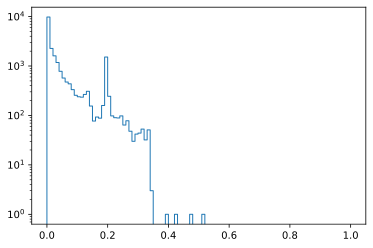

In [13]:
plt.hist(elecKE.flatten(), histtype='step', bins=100, range=(0,1));
plt.semilogy()